

# ***Modulo 2***
Sebastián Burgos Alanís A01746459

CNN con Keras, modelo predictivo para tumores cerebrales

[Kaggle DB](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

El Colab está dividido en 6 secciones:

***Procesamiento del DataSet***
  - Se procesa el dataset, se modifican las terminaciones de las imagenes y se establece un tamaño 128,128 y 3 colores RGB

**Construccion del Modelo**
 - Se entrena el modelo y se aplican parametros como binary_crosetopy
 - Se muestra matriz de confusion y gráfica de pérdida

***Revision del Modelo***
 - Se corre una muestra individual para tumor 0 y 1

***Resultados del Problema***
 - Se muestran los resultados del primer modelo

***Cambios Realizados***
 - Se indican los cambios realizados para ajustar el modelo previo.

***Posibles Mejoras***
 - Se realizan cambios en el modelo como:
  * modificación de prámetros.
  * resultados nuevos.

# ***Procesamiento DB***

In [74]:
import os
import keras
import numpy as np
import pandas as pd
from google.colab import drive
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score


In [64]:
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset
/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset
no  yes


In [65]:
label_encoder = LabelEncoder()
label_encoder.fit([0, 1])

encoder = OneHotEncoder(sparse=False)
encoder.fit(label_encoder.transform([0, 1]).reshape(-1, 1))

data = []
result = []

# Procesamiento de imágenes y su label encode a tumores (0) y no tumores (1)

def Imagenes_procesamiento(image_folder, label):
    paths = []
    for filename in os.listdir(image_folder):
        if filename.lower().endswith((".jpg", ".jpeg")):
            new_filename = os.path.splitext(filename)[0] + ".jpg"
            new_path = os.path.join(image_folder, new_filename)
            os.rename(os.path.join(image_folder, filename), new_path)
            paths.append(new_path)

    # Procesar todas las imágenes y estadnarizar el tamaño
    # Hacer un arreglo Numpy con las imagenes y crear un label_encoder
    for path in paths:
        img = Image.open(path)
        img = img.resize((128, 128))
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(np.array(img))
            label_encoded = label_encoder.transform([label]).reshape(-1, 1)
            one_hot_label = encoder.transform(label_encoded)
            result.append(one_hot_label[0])

Imagenes_yes = "/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/yes"
Imagenes_no = "/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/no"

# Prcesamiento de Imágenes para tumores y noTumores
Imagenes_procesamiento(Imagenes_yes, label=0)
Imagenes_procesamiento(Imagenes_no, label=1)

data = np.array(data)
result = np.array(result)

print("Data Shape:", data.shape, "Result Shape", result.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Data Shape: (216, 128, 128, 3) Result Shape (216, 2)


# **Construcción del modelo**

In [66]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [67]:
#Creacion del modelo para apilar las capas en secuencia.
model = Sequential()

# se espera una imagen 128 x 128 y 3 colores, donde 32 filtros irán aprendiendo.
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))

model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

# Acelerar el procesamiento agregando capa de normalización.
model.add(BatchNormalization())

# Resolución espacial
model.add(MaxPooling2D(pool_size=(2, 2)))

# Prevenir sobre ajuste
model.add(Dropout(0.25))

# relu = no linealidad
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Convertir las capas 2D en 1D para mejorar el procesamiento y hacerlo más rápido
model.add(Flatten())

# Capa totalemente conectada con 512 unidadeds
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Categorical_crossentropy se utiliza para modelos con calsificación y Adamax para ajustar los pesos de la red
model.compile(loss = "binary_crossentropy", optimizer='Adamax')

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_29 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_14 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 64)       

In [85]:
y_train.shape


(172, 2)

In [86]:
x_train.shape

(172, 128, 128, 3)

In [69]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
5/5 [==============================] - 17s 3s/step - loss: 12.6215 - val_loss: 21.2977
Epoch 2/30
5/5 [==============================] - 15s 3s/step - loss: 6.8302 - val_loss: 18.5960
Epoch 3/30
5/5 [==============================] - 15s 3s/step - loss: 4.5434 - val_loss: 6.0409
Epoch 4/30
5/5 [==============================] - 15s 3s/step - loss: 2.2439 - val_loss: 4.0462
Epoch 5/30
5/5 [==============================] - 15s 3s/step - loss: 1.7247 - val_loss: 6.9004
Epoch 6/30
5/5 [==============================] - 16s 3s/step - loss: 0.9629 - val_loss: 6.2499
Epoch 7/30
5/5 [==============================] - 16s 3s/step - loss: 0.4629 - val_loss: 3.8156
Epoch 8/30
5/5 [==============================] - 15s 3s/step - loss: 0.2129 - val_loss: 3.2673
Epoch 9/30
5/5 [==============================] - 16s 3s/step - loss: 0.1965 - val_loss: 3.5676
Epoch 10/30
5/5 [==============================] - 16s 3s/step - loss: 0.1308 - val_loss: 3.3496
Epoch 11/30
5/5 [===================

In [77]:
y_pred = model.predict(x_test)

# Convert predictions and true labels to binary labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 1s 322ms/step
Accuracy: 79.55%


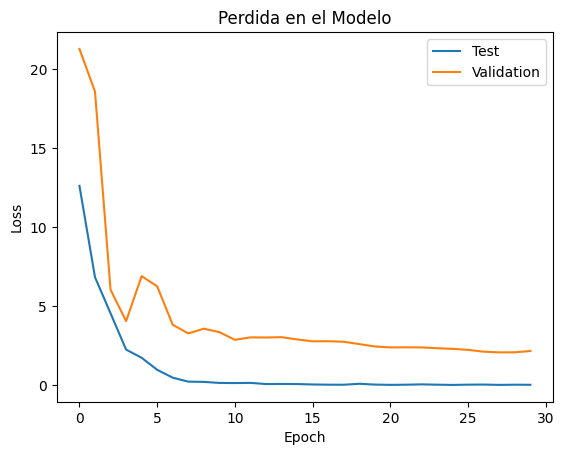

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida en el Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

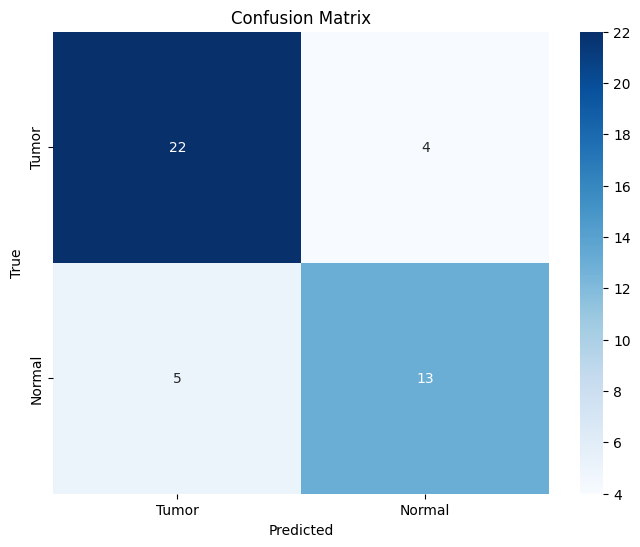

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = ["Tumor", "Normal"]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



# ***Revision del Modelo***



In [79]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its not a tumor'

100.0% Confidence Its not a tumor


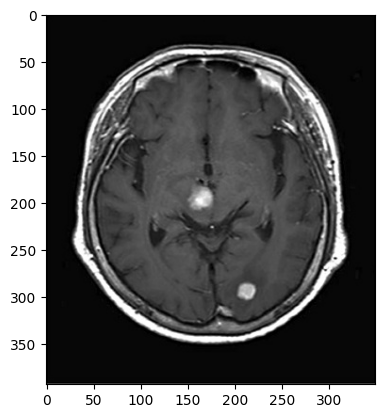

In [80]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.9432384967804% Confidence Its a Tumor


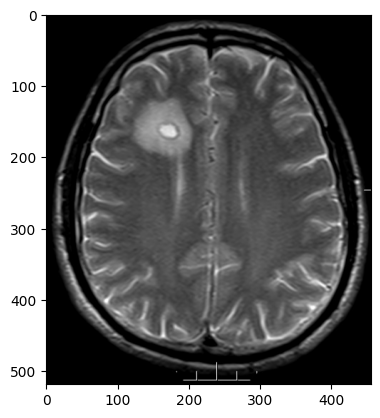

In [81]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

# ***Resultados del Problema***

Accuracy: 75%

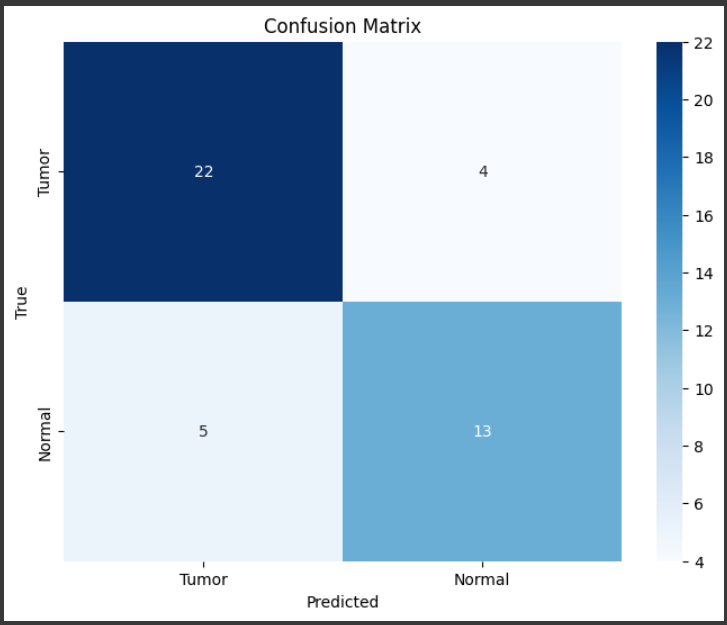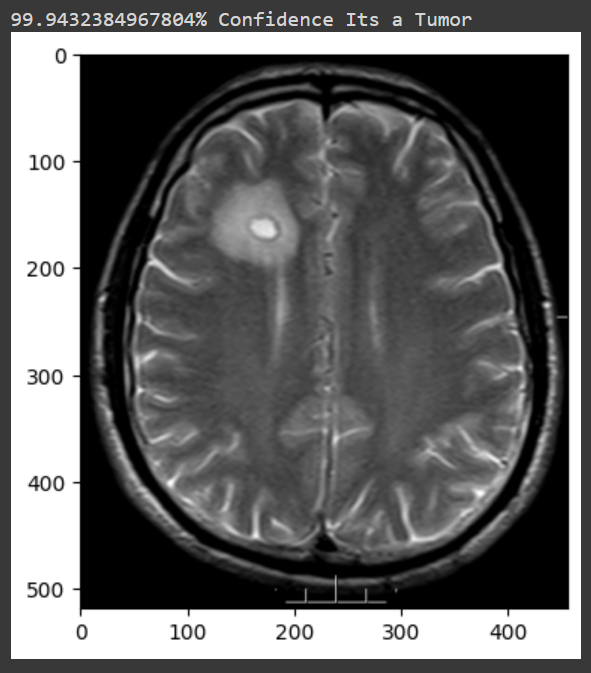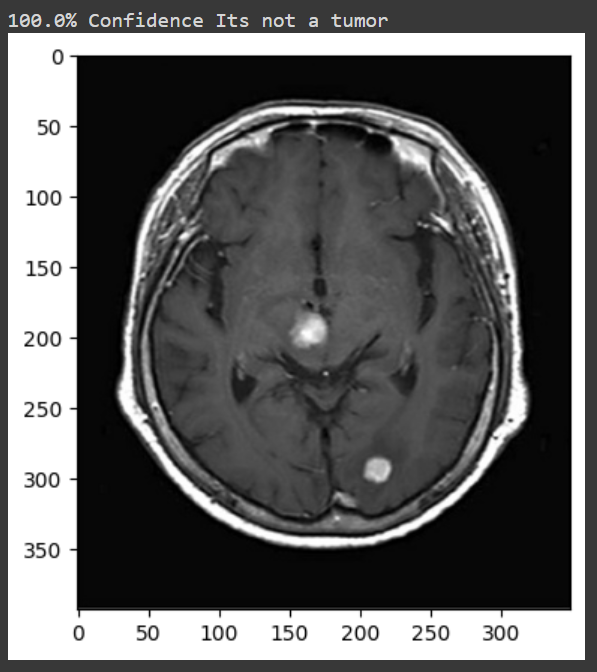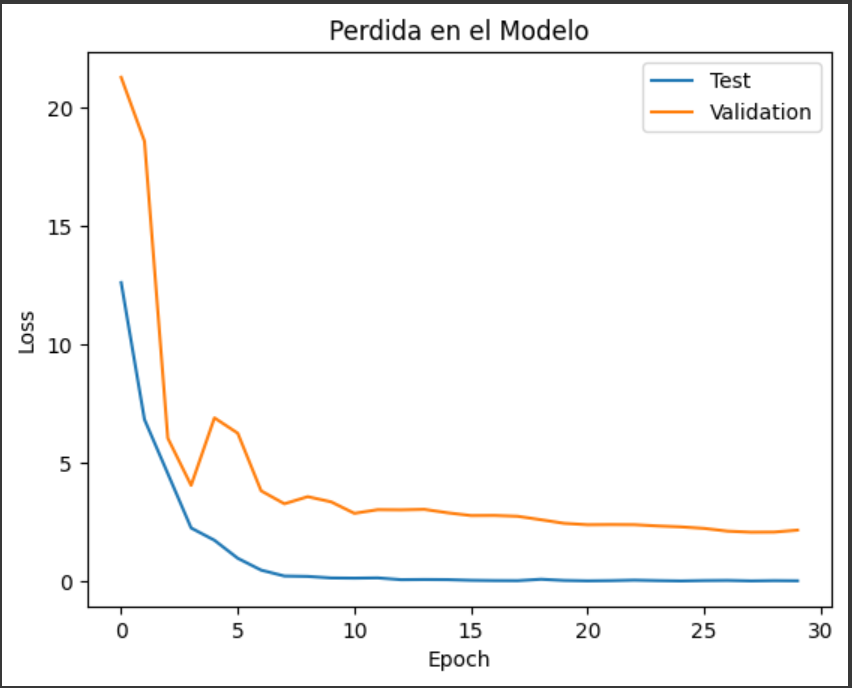

# ***Cambios Realizados***


Durante el proceso de búsqueda de mejoras para el modelo, identifiqué un problema en el conjunto de datos. Descubrí que varias imágenes estaban en un formato con extensión ".JPG" en lugar de la esperada ".jpg" o tambien "."jpeg" o "JPEG". Para abordar esta cuestión, realicé una modificación en el proceso de procesamiento de datos. Aplicando una conversión a minúsculas (lowercase) a las extensiones de archivo, permití que las imágenes en formato ".JPG" se incluyeran en el conjunto de datos, asi como una modificación en las terminaciones que todas sean jpg. Como resultado de esta corrección, el conjunto de datos creció de 160 a 216 imágenes.

# **Cambios de parámetros y posibles mejoras**

Accuracy: 79%

In [88]:
model = Sequential()

# Layer 1
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten
model.add(Flatten())

# Fully Connected
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='Adam')

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_16 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)       

In [89]:
y_train.shape

(172, 2)

In [90]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
5/5 [==============================] - 21s 4s/step - loss: 4.9500 - val_loss: 29.8157
Epoch 2/30
5/5 [==============================] - 18s 3s/step - loss: 2.1932 - val_loss: 10.3275
Epoch 3/30
5/5 [==============================] - 17s 3s/step - loss: 1.2912 - val_loss: 15.1342
Epoch 4/30
5/5 [==============================] - 19s 4s/step - loss: 0.6296 - val_loss: 4.2487
Epoch 5/30
5/5 [==============================] - 20s 3s/step - loss: 0.3764 - val_loss: 3.3337
Epoch 6/30
5/5 [==============================] - 21s 3s/step - loss: 0.1965 - val_loss: 4.2611
Epoch 7/30
5/5 [==============================] - 18s 4s/step - loss: 0.0433 - val_loss: 3.4914
Epoch 8/30
5/5 [==============================] - 18s 4s/step - loss: 0.1011 - val_loss: 3.7684
Epoch 9/30
5/5 [==============================] - 18s 4s/step - loss: 0.0241 - val_loss: 3.8216
Epoch 10/30
5/5 [==============================] - 17s 3s/step - loss: 0.0055 - val_loss: 3.2719
Epoch 11/30
5/5 [===================

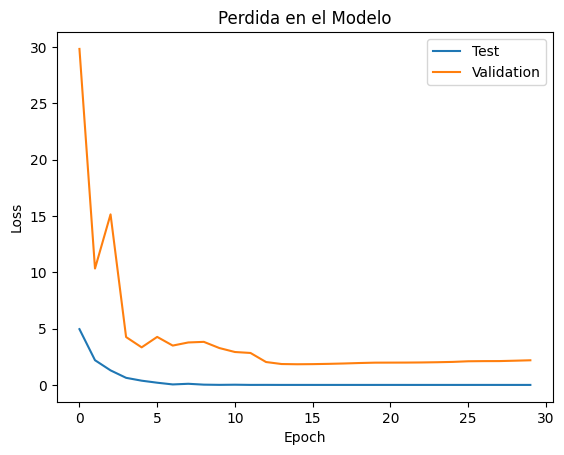

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida en el Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [92]:
y_pred = model.predict(x_test)

# Convert predictions and true labels to binary labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

2/2 [==============================] - 2s 193ms/step
Accuracy: 79.55%


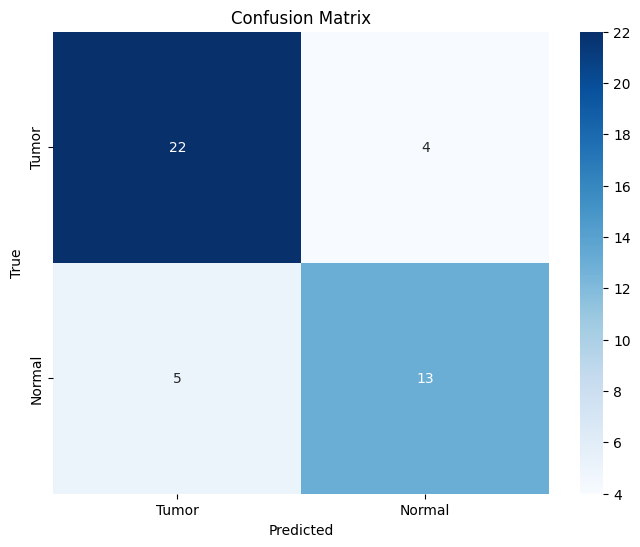

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = ["Tumor", "Normal"]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [94]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its not a tumor'

100.0% Confidence Its not a tumor


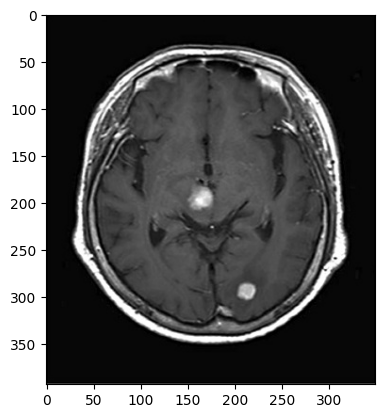

In [95]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence Its a Tumor


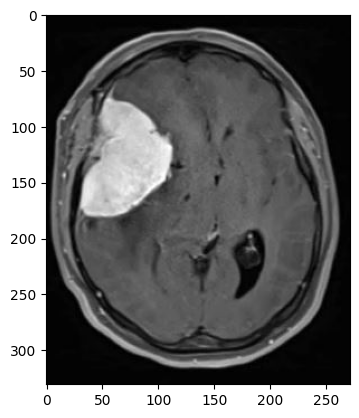

In [96]:
#Tumor False pero se puso una imagen true
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/yes/Y243.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.99043941497803% Confidence Its not a tumor


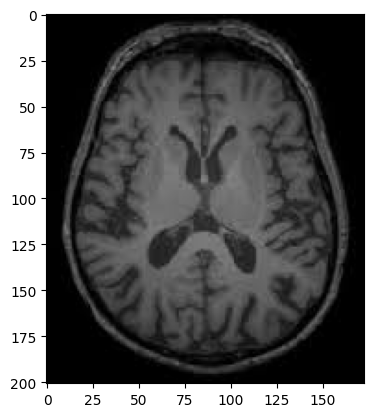

In [97]:
#Tumor False pero se puso una imagen true
from matplotlib.pyplot import imshow
img = Image.open(r"/content/gdrive/MyDrive/7to Semestre/Blum/2ndBloque/brain_tumor_dataset/no/10 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

Incrementó 4% el cambio de parametros.